# Credit Risk Analysis:

Project Objective: Develop models to predict the probability of default for credit applicants using historical loan data.

Public Datasets: UCI Machine Learning Repository has several datasets related to credit scoring.

Tools and Skills: Python or R for statistical modeling, SQL for data manipulation, and Tableau or Power BI for visualizing the risk profiles.

# Credit Risk Analysis Project

## Files Description

- **features.csv**: Contains the features of the dataset that describe various attributes of credit applicants.
- **targets.csv**: Contains the target variable indicating whether the credit risk is classified as 'good' or 'bad'.
- **metadata_and_variables.txt**: Contains metadata and detailed descriptions of the variables in the dataset.

## Project Steps

### Step 1: Load and Prepare Data
Load the data from the `features.csv` and `targets.csv` files, and prepare it for analysis. This involves checking for missing values, exploring data types, and potentially normalizing or encoding data as needed.

### Step 2: Exploratory Data Analysis (EDA)
Conduct an exploratory analysis to understand the distributions, correlations, and potential relationships within the data. This step can help in identifying which features are most relevant for predicting credit risk.

### Step 3: Data Visualization
Use tools like Tableau or Power BI to visualize the data and explore patterns that might be important for model building. Visualization can be especially helpful in understanding complex relationships and in communicating findings to stakeholders.

### Step 4: Statistical Modeling
Develop statistical models using Python or R. Given the data and the project's classification nature, models like logistic regression, decision trees, or more advanced ensemble methods like random forests or gradient boosting machines could be appropriate. Model selection should consider the prediction performance and the interpretability of the models.

### Step 5: Model Evaluation
Evaluate the models using appropriate metrics such as accuracy, AUC-ROC, precision, recall, and F1-score. Since the dataset includes a cost matrix, it's crucial to consider the cost of misclassification in the evaluation to minimize potential financial losses.

### Step 6: SQL for Data Manipulation
Utilize SQL for more efficient data manipulation and preparation if the data volume increases or if you need to integrate data from multiple sources.

### Step 7: Model Deployment
Prepare the model for deployment in a production environment where it can be used to predict default probabilities for new credit applicants in real-time.

### Step 8: Continuous Monitoring and Updating
Establish a process for continuously monitoring the model's performance over time against new data and updating the model as necessary to maintain its accuracy and relevance.


In [2]:
!pip3 install -U ucimlrepo 

In [3]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()


-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# Data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Save features and targets to CSV
X.to_csv('features.csv', index=False)
y.to_csv('targets.csv', index=False)

# Metadata and variable information can also be printed or saved
print(statlog_german_credit_data.metadata)
print(statlog_german_credit_data.variables)

# Optionally, save metadata and variables to a text file
with open('metadata_and_variables.txt', 'w') as f:
    f.write(str(statlog_german_credit_data.metadata))
    f.write("\n")
    f.write(str(statlog_german_credit_data.variables))


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

## Step 1: Load and Prepare Data
Loading data and preparing it for analysis. This includes handling missing values if necessary, although from your dataset's description, there are no missing values.

In [5]:
import pandas as pd

# Load the data
features = pd.read_csv('C:/Users/dhill/features.csv')
targets = pd.read_csv('C:/Users/dhill/targets.csv')

# Check the first few rows of the dataset
print(features.head())
print(targets.head())

# Check for any missing values and data types
print(features.info())
print(targets.info())


  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0        A75           4        A93        A101            4        A121   
1        A73           2        A92        A101            2        A121   
2        A74           2        A93        A101            3        A121   
3        A74           2        A93        A103            4        A122   
4        A73           3        A93        A101            4        A124   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0           67        A1

In [8]:
features.columns =['status','duration','credit_history','purpose','credit_amount','savings','tenure','installment_rate_per',
                    'sex','Other debtors / guarantors','residence_yr','property','age',
                   ' Other installment plans','housing','no_of accounts','job',
                   'Number of people being liable to provide maint','phone','foreign_worker']
features


,status,duration,credit_history,purpose,credit_amount,savings,tenure,installment_rate_per,sex,Other debtors / guarantors,residence_yr,property,age,Other installment plans,housing,no_of accounts,job,Number of people being liable to provide maint,phone,foreign_worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


## Step 2: Exploratory Data Analysis (EDA)
For exploratory data analysis, a look at summary statistics, distribution of data, and correlation between features.

          duration  credit_amount  installment_rate_per  residence_yr  \
count  1000.000000    1000.000000           1000.000000   1000.000000   
mean     20.903000    3271.258000              2.973000      2.845000   
std      12.058814    2822.736876              1.118715      1.103718   
min       4.000000     250.000000              1.000000      1.000000   
25%      12.000000    1365.500000              2.000000      2.000000   
50%      18.000000    2319.500000              3.000000      3.000000   
75%      24.000000    3972.250000              4.000000      4.000000   
max      72.000000   18424.000000              4.000000      4.000000   

               age  no_of accounts  \
count  1000.000000     1000.000000   
mean     35.546000        1.407000   
std      11.375469        0.577654   
min      19.000000        1.000000   
25%      27.000000        1.000000   
50%      33.000000        1.000000   
75%      42.000000        2.000000   
max      75.000000        4.000000   


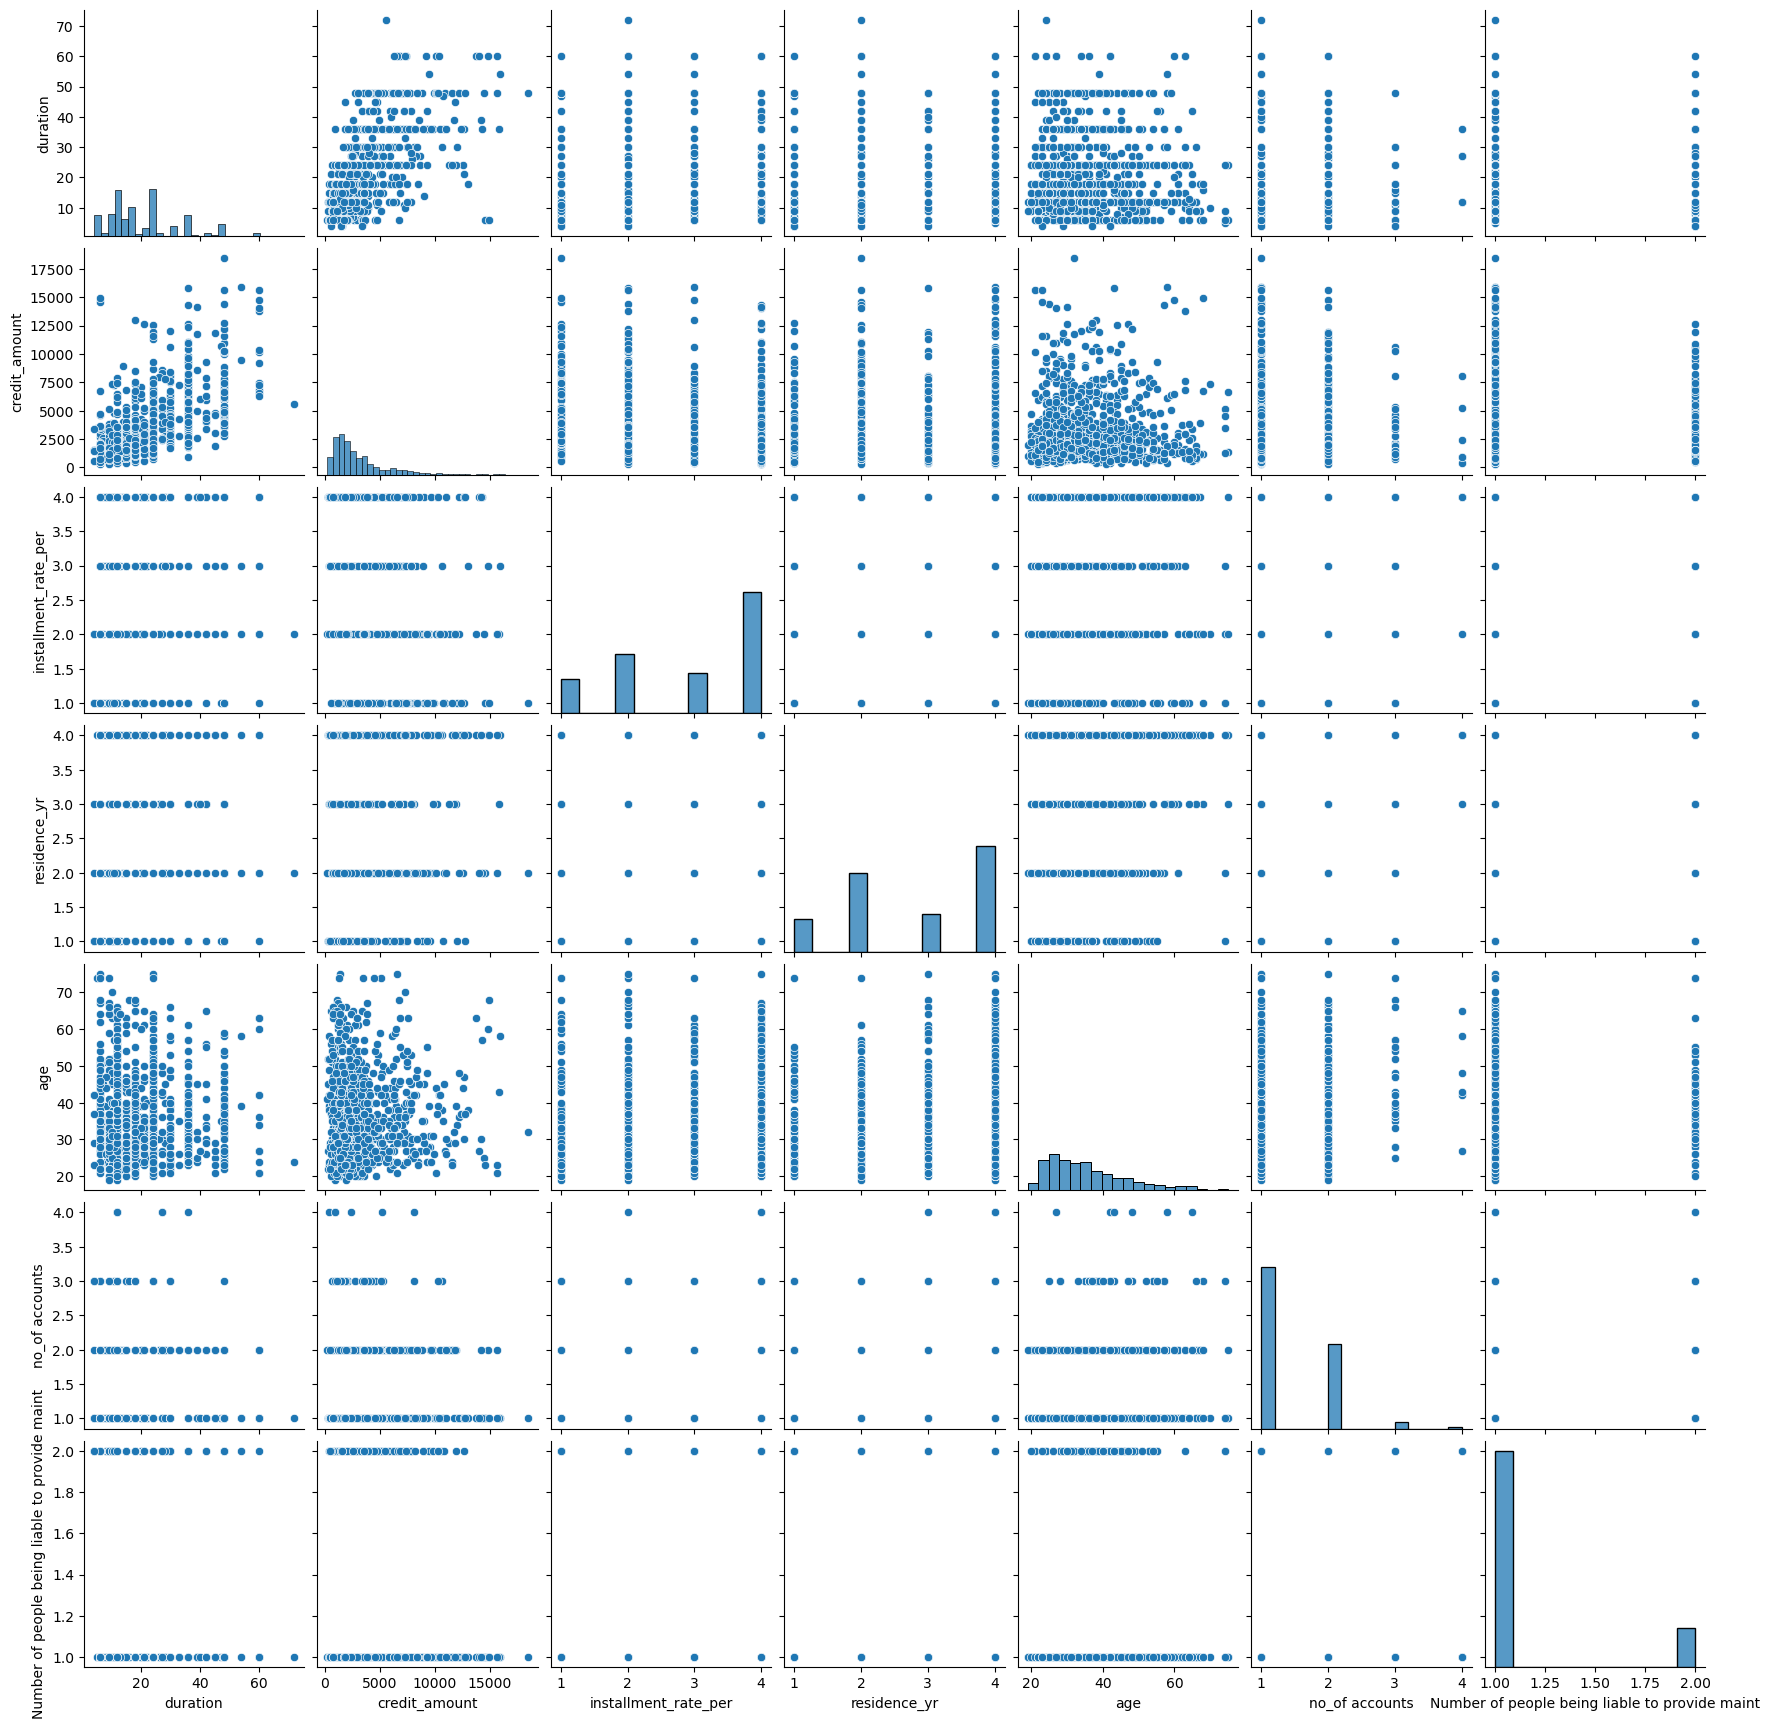

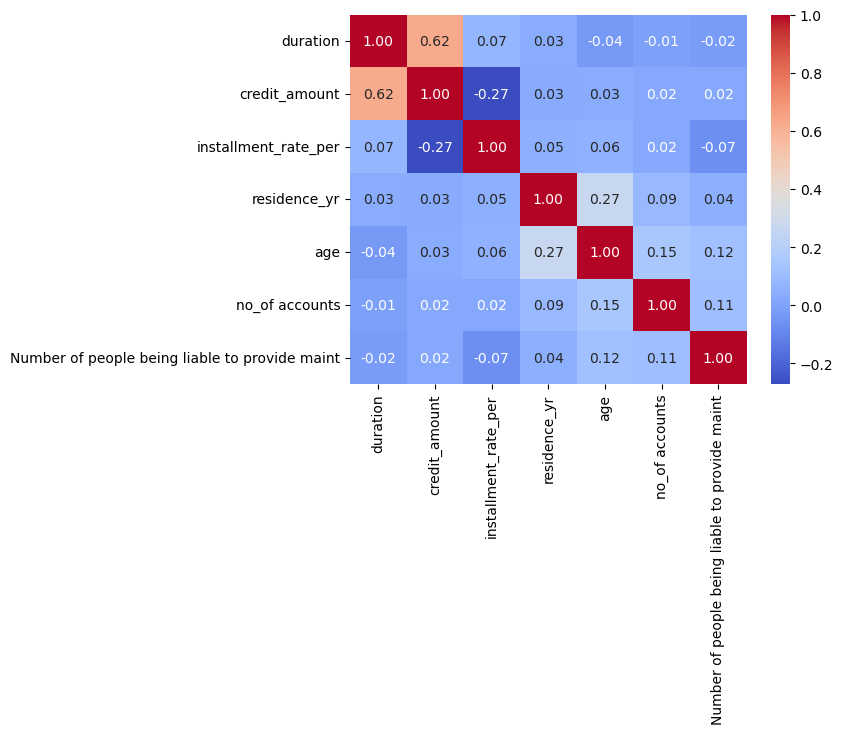

In [9]:
# Summary statistics
print(features.describe())

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize the distribution of features and relationships between them
sns.pairplot(features)
plt.show()

# Correlation heatmap
sns.heatmap(features.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


## Step 3: Data Visualization
For visualization, creating more specific plots to understand the relationships between features and the target variable.

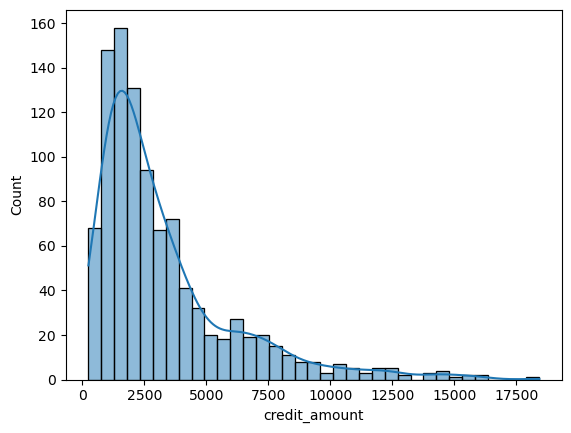

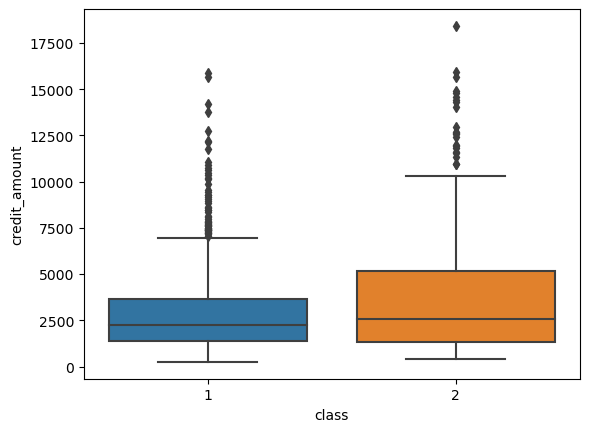

In [10]:
# Example: Distribution of credit amount which is Attribute5
sns.histplot(data=features, x='credit_amount', kde=True)
plt.show()

# Relationship between credit amount and target
sns.boxplot(x=targets['class'], y=features['credit_amount'])
plt.show()


## Step 4: Statistical Modeling
Now, you can build a model to predict the credit risk. Let’s use a logistic regression model as an example.

In [11]:
# 4.1 Identify Categorical Features
# First, identify which columns are categorical. You can do this by examining the data types or unique values in each column.
# Print data types of each column
print(features.dtypes)

# Print unique values in columns that are of object type
for col in features.columns:
    if features[col].dtype == 'object':
        print(f'{col}:', features[col].unique())


status                                            object
duration                                           int64
credit_history                                    object
purpose                                           object
credit_amount                                      int64
savings                                           object
tenure                                            object
installment_rate_per                               int64
sex                                               object
Other debtors / guarantors                        object
residence_yr                                       int64
property                                          object
age                                                int64
 Other installment plans                          object
housing                                           object
no_of accounts                                     int64
job                                               object
Number of people being liable t

In [12]:
# 4.2 . Encode Categorical Features
# Once you've identified the categorical columns, you can use encoding techniques to convert these columns to numerical format.
# A common approach is to use one-hot encoding, which can be easily done with pandas using get_dummies.

# One-hot encode the categorical columns
features_encoded = pd.get_dummies(features, drop_first=True)

# Now check the first few rows to see the changes
print(features_encoded.head())


   duration  credit_amount  installment_rate_per  residence_yr  age  \
0         6           1169                     4             4   67   
1        48           5951                     2             2   22   
2        12           2096                     2             3   49   
3        42           7882                     2             4   45   
4        24           4870                     3             4   53   

   no_of accounts  Number of people being liable to provide maint  status_A12  \
0               2                                               1           0   
1               1                                               1           1   
2               1                                               2           0   
3               1                                               2           0   
4               2                                               2           0   

   status_A13  status_A14  ...  property_A124   Other installment plans_A142  \
0     

In [13]:
# 4.3. Update Model Training Code
# Now that all features are numerical, update your model training code to use the encoded features.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the encoded data
X_train, X_test, y_train, y_test = train_test_split(features_encoded, targets['class'], test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter if convergence issues occur
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           1       0.80      0.89      0.84       209
           2       0.66      0.47      0.55        91

    accuracy                           0.77       300
   macro avg       0.73      0.68      0.70       300
weighted avg       0.76      0.77      0.75       300

[[187  22]
 [ 48  43]]


## Step 5: Model Evaluation
We've already covered some basic evaluation using classification report and confusion matrix in the modeling step.

## Step 6: SQL for Data Manipulation
This step is generally done outside of Python, in a database environment. If you need to simulate SQL-like operations in Python, you can use pandas:

In [14]:
# Example SQL-like operation: Select all applicants with Credit amount greater than 5000
high_credit = features[features['credit_amount'] > 5000]
print(high_credit.head())


  status  duration credit_history purpose  credit_amount savings tenure  \
1    A12        48            A32     A43           5951     A61    A73   
3    A11        42            A32     A42           7882     A61    A74   
5    A14        36            A32     A46           9055     A65    A73   
7    A12        36            A32     A41           6948     A61    A73   
9    A12        30            A34     A40           5234     A61    A71   

   installment_rate_per  sex Other debtors / guarantors  residence_yr  \
1                     2  A92                       A101             2   
3                     2  A93                       A103             4   
5                     2  A93                       A101             4   
7                     2  A93                       A101             2   
9                     4  A94                       A101             2   

  property  age  Other installment plans housing  no_of accounts   job  \
1     A121   22                     